In [1]:
import numpy as np

from qiskit.primitives import StatevectorSampler as Sampler
from qiskit import QuantumRegister, AncillaRegister, QuantumCircuit, ClassicalRegister
from qiskit.visualization import plot_histogram

x_bits = QuantumRegister(2, name='x')
y_bit = QuantumRegister(1, name='y')
c_bits = ClassicalRegister(2, name='cbits')

def simulate_circuit(circuit):
    sampler = Sampler()

    job = sampler.run([circuit], shots=1000)
    job_result = job.result()

    data_bin = job_result[0].data

    return data_bin.cbits.get_counts()

### Increment

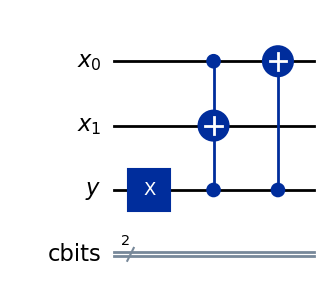

In [2]:
qc_increment = QuantumCircuit(x_bits, y_bit, c_bits)

qc_increment.x(y_bit)
qc_increment.ccx(y_bit, x_bits[0], x_bits[1])
qc_increment.cx(y_bit, x_bits[0])

qc_increment.draw(output='mpl')

In [3]:
def prepare_increment_circuit(initial_circuit):
    qc = initial_circuit.copy()
    qc = qc.compose(qc_increment)
    for i in range(2):
        qc.measure(x_bits[i], c_bits[i])
    
    return qc

#### Increment $|00⟩$

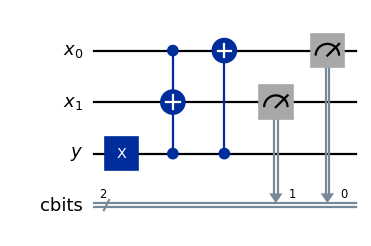

In [4]:
qc_00 = QuantumCircuit(x_bits, y_bit, c_bits)
qc_00 = prepare_increment_circuit(initial_circuit=qc_00)

qc_00.draw(output="mpl", scale=0.8)

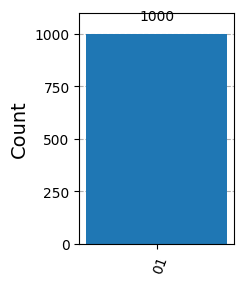

In [5]:
counts_00 = simulate_circuit(qc_00)
plot_histogram(counts_00, figsize=(2, 3))

#### Increment $|01⟩$

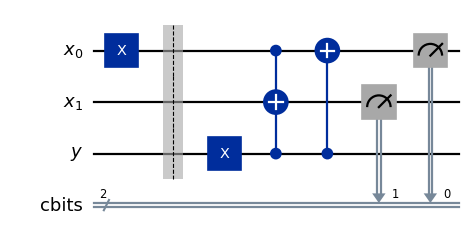

In [6]:
qc_01 = QuantumCircuit(x_bits, y_bit, c_bits)
qc_01.x(x_bits[0])
qc_01.barrier()

qc_01 = prepare_increment_circuit(initial_circuit=qc_01)

qc_01.draw(output="mpl", scale=0.8)

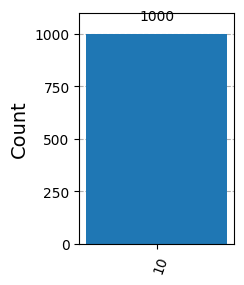

In [7]:
counts_01 = simulate_circuit(qc_01)
plot_histogram(counts_01, figsize=(2, 3))

#### Increment $|10⟩$

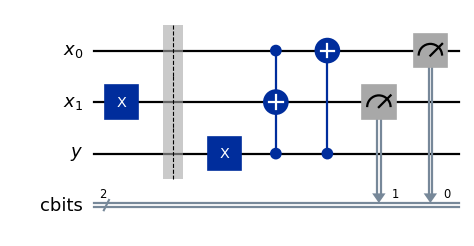

In [8]:
qc_10 = QuantumCircuit(x_bits, y_bit, c_bits)
qc_10.x(x_bits[1])
qc_10.barrier()

qc_10 = prepare_increment_circuit(initial_circuit=qc_10)

qc_10.draw(output="mpl", scale=0.8)

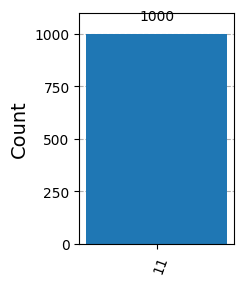

In [9]:
counts_10 = simulate_circuit(qc_10)
plot_histogram(counts_10, figsize=(2, 3))

#### Increment $|11⟩$

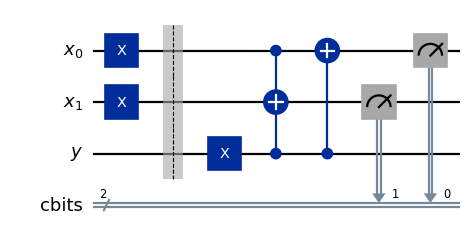

In [10]:
qc_11 = QuantumCircuit(x_bits, y_bit, c_bits)
qc_11.x(x_bits)
qc_11.barrier()

qc_11 = prepare_increment_circuit(initial_circuit=qc_11)

qc_11.draw(output="mpl", scale=0.8)

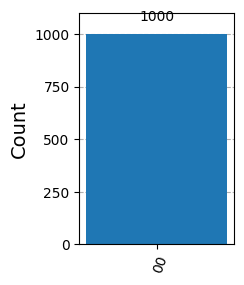

In [11]:
counts_11 = simulate_circuit(qc_11)
plot_histogram(counts_11, figsize=(2, 3))

### Decrement

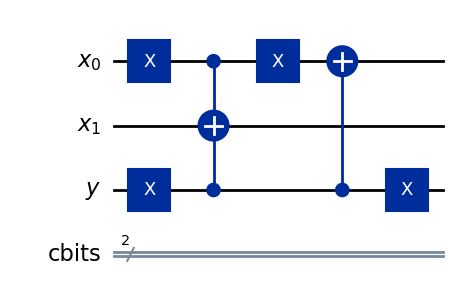

In [12]:
qc_decrement = QuantumCircuit(x_bits, y_bit, c_bits)

qc_decrement.x(x_bits[0])
qc_decrement.x(y_bit)
qc_decrement.ccx(y_bit, x_bits[0], x_bits[1])
qc_decrement.x(x_bits[0])
qc_decrement.cx(y_bit, x_bits[0])
qc_decrement.x(y_bit)

def prepare_decrement_circuit(initial_circuit):
    qc = initial_circuit.copy()
    qc = qc.compose(qc_decrement)
    for i in range(2):
        qc.measure(x_bits[i], c_bits[i])
    
    return qc

qc_decrement.draw(output='mpl')

#### Decrement $|00⟩$

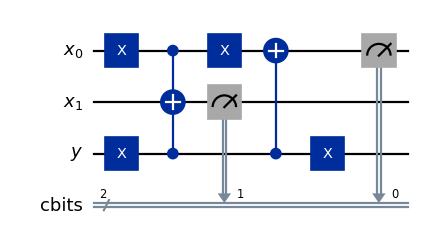

In [13]:
qc_00 = QuantumCircuit(x_bits, y_bit, c_bits)
qc_00 = prepare_decrement_circuit(initial_circuit=qc_00)

qc_00.draw(output="mpl", scale=0.8)

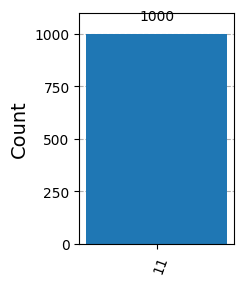

In [14]:
counts_00 = simulate_circuit(qc_00)
plot_histogram(counts_00, figsize=(2, 3))

#### Decrement $|01⟩$

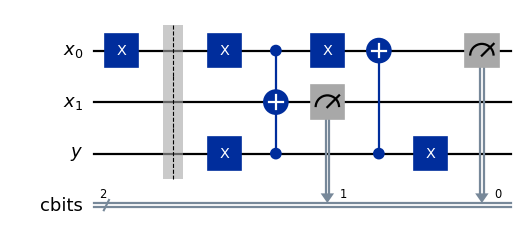

In [15]:
qc_01 = QuantumCircuit(x_bits, y_bit, c_bits)
qc_01.x(x_bits[0])
qc_01.barrier()

qc_01 = prepare_decrement_circuit(initial_circuit=qc_01)

qc_01.draw(output="mpl", scale=0.8)

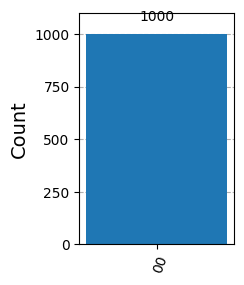

In [16]:
counts_01 = simulate_circuit(qc_01)
plot_histogram(counts_01, figsize=(2, 3))

#### Decrement $|10⟩$

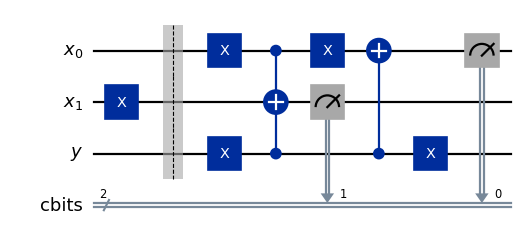

In [17]:
qc_10 = QuantumCircuit(x_bits, y_bit, c_bits)
qc_10.x(x_bits[1])
qc_10.barrier()

qc_10 = prepare_decrement_circuit(initial_circuit=qc_10)

qc_10.draw(output="mpl", scale=0.8)

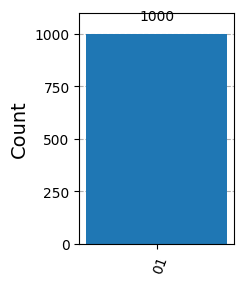

In [18]:
counts_10 = simulate_circuit(qc_10)
plot_histogram(counts_10, figsize=(2, 3))

#### Decrement $|11⟩$

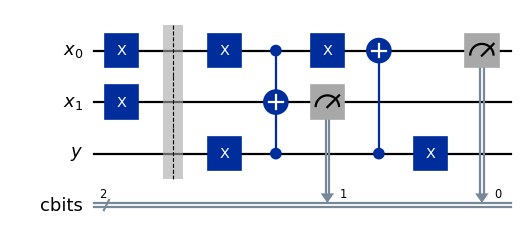

In [19]:
qc_11 = QuantumCircuit(x_bits, y_bit, c_bits)
qc_11.x(x_bits)
qc_11.barrier()

qc_11 = prepare_decrement_circuit(initial_circuit=qc_11)

qc_11.draw(output="mpl", scale=0.8)

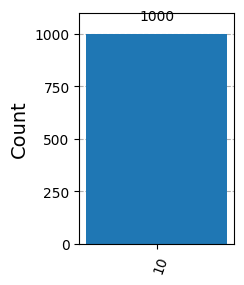

In [20]:
counts_11 = simulate_circuit(qc_11)
plot_histogram(counts_11, figsize=(2, 3))